# Data Exploration

In this notebook describe your data exploration steps.

## Install & Import dependencies

In [75]:
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load data

In [4]:
cloud_df = pd.read_sql_table("cloud_data", "sqlite:///data.sqlite")
# bedeckungsgrad: estimated coverage of the visible sky with clouds in eighths

# Replace -999 with NaN
cloud_df.replace(-999, pd.NA, inplace=True)

# Keep only the date
cloud_df["date"] = pd.to_datetime(cloud_df["mess_datum"]).dt.date
cloud_df.drop("mess_datum", axis=1, inplace=True)

# Group by mess_datum and calculate the average of bedeckungsgrad
cloud_df = cloud_df.groupby("date").mean().reset_index()

# Drop the stations_id and the wolkendichte columns
cloud_df.drop(["stations_id", "wolkendichte"], axis=1, inplace=True)  # NOTE: wolkendichte is currently not used - drop to save memory

print(cloud_df)

            date bedeckungsgrad
0     2017-01-25       7.291667
1     2017-01-26       3.986254
2     2017-01-27        2.02926
3     2017-01-28       3.579505
4     2017-01-29       5.352837
...          ...            ...
1400  2020-11-25       6.136752
1401  2020-11-26        6.14359
1402  2020-11-27       5.484375
1403  2020-11-28       6.093694
1404  2020-11-29       5.899642

[1405 rows x 2 columns]


In [5]:
rain_df = pd.read_sql_table("rain_data", "sqlite:///data.sqlite")
# niederschlagshoehe: precipitation height in mm
# niederschlagsform: precipitation form
# schneehoehe_cm: snow height in cm
# neuschneehoehe_cm: fresh snow height in cm

# Replace -999 with NaN
rain_df.replace(-999, pd.NA, inplace=True)

# Fill niederschlagsform column with pd.NA where applicable
code_mapping = {
    4: pd.NA, # Form of precipitation not known, although precipitation reported
    9: pd.NA, # Misidentification; missing value or precipitation form not detectable with automatic measurement
}
rain_df["niederschlagsform"] = rain_df["niederschlagsform"].replace(code_mapping)

# Custom function to calculate the mode excluding the value 0
# NOTE: This is done to prevent having most of the values being 0 since in most cases there is no precipitation but that"s not interesting
def mode_without_zero(x):
    x = x[x != 0]
    return x.mode() if not x.empty else pd.NA

# Group by date and calculate fitting aggregations for each column
aggregations = {
    "niederschlagshoehe_mm": "mean",
    "niederschlagsform": mode_without_zero,
    "schneehoehe_cm": "mean",
    "neuschneehoehe_cm": "mean",
}
rain_df["date"] = pd.to_datetime(rain_df["mess_datum"]).dt.date
rain_df.drop("mess_datum", axis=1, inplace=True)

rain_df = rain_df.groupby("date").agg(aggregations).reset_index()

print(rain_df)

            date niederschlagshoehe_mm niederschlagsform schneehoehe_cm   
0     2017-01-25              0.005414                 7       8.851808  \
1     2017-01-26              0.000325                 7       8.650059   
2     2017-01-27              0.000217                 1        8.39822   
3     2017-01-28              0.118482                 6       8.075416   
4     2017-01-29              0.559761                 6       7.714116   
...          ...                   ...               ...            ...   
1401  2020-11-26              0.226201                 6       0.032787   
1402  2020-11-27              0.023212                 6       0.031656   
1403  2020-11-28              0.029349                 6       0.031161   
1404  2020-11-29               0.06834                 6       0.033994   
1405  2020-11-30              3.553369                 8       0.041832   

     neuschneehoehe_cm  
0              0.02129  
1             0.004386  
2              0.00188  

In [6]:
temperature_df = pd.read_sql_table("temperature_data", "sqlite:///data.sqlite")
# lufttemperatur: air temperature in °C
# rel_feuchte: relative humidity in %

# Replace -999 with NaN
temperature_df.replace(-999, pd.NA, inplace=True)

# Keep only the date part in the mess_datum column
temperature_df["date"] = pd.to_datetime(temperature_df["mess_datum"]).dt.date
temperature_df.drop("mess_datum", axis=1, inplace=True)

temperature_df = temperature_df.groupby("date")[["lufttemperatur", "rel_feuchte"]].mean().reset_index()

print(temperature_df)

            date lufttemperatur rel_feuchte
0     2017-01-25      -3.442213   87.438141
1     2017-01-26      -2.463581   80.487406
2     2017-01-27      -2.210204   73.508844
3     2017-01-28      -2.100546   74.789761
4     2017-01-29       0.387363   81.773907
...          ...            ...         ...
1400  2020-11-25       2.515915   89.532787
1401  2020-11-26       3.280698   91.195072
1402  2020-11-27       2.601096   91.718493
1403  2020-11-28       1.314686   90.013671
1404  2020-11-29       0.415469   83.557837

[1405 rows x 3 columns]


In [7]:
wind_df = pd.read_sql_table("wind_data", "sqlite:///data.sqlite")
# windstaerke: wind speed in Bft

# Replace -999 with NaN
wind_df.replace(-999, pd.NA, inplace=True)

# Keep only the date part in the mess_datum column
wind_df["date"] = pd.to_datetime(wind_df["mess_datum"]).dt.date
wind_df.drop("mess_datum", axis=1, inplace=True)

wind_df = wind_df.groupby("date")["windstaerke"].mean().reset_index()

print(wind_df)

            date windstaerke
0     2017-01-25    2.223214
1     2017-01-26    2.682422
2     2017-01-27    2.318584
3     2017-01-28    2.176296
4     2017-01-29    2.369436
...          ...         ...
1400  2020-11-25    2.371512
1401  2020-11-26    2.147929
1402  2020-11-27    1.681481
1403  2020-11-28    2.123894
1404  2020-11-29    2.115044

[1405 rows x 2 columns]


In [8]:
audio_features_df = pd.read_sql_table("audio_features", "sqlite:///data.sqlite")
print(audio_features_df)

      acousticness  danceability  duration_ms  energy  instrumentalness  key   
0          0.17100         0.658       168991   0.624          0.005880    1  \
1          0.27300         0.806       157849   0.475          0.000603    1   
2          0.22100         0.700       140526   0.722          0.000000    7   
3          0.25000         0.800       195429   0.658          0.000000    1   
4          0.08070         0.845       176400   0.518          0.150000    7   
...            ...           ...          ...     ...               ...  ...   
7315       0.01850         0.636       219043   0.815          0.000000    5   
7316       0.00681         0.643       224272   0.732          0.000046    5   
7317       0.03720         0.641       241933   0.630          0.000000    8   
7318       0.06810         0.731       225854   0.675          0.000000    7   
7319       0.02590         0.615       284693   0.598          0.000000    4   

      liveness  loudness  mode  speechi

In [9]:
songs_df = pd.read_sql_table("spotify_data", "sqlite:///data.sqlite")

# Convert the "date" column to pd.datetime
songs_df["date"] = pd.to_datetime(songs_df["date"]).dt.date
print(songs_df)

              date  position                track_id   
0       2020-11-05         1  5FLkxbVtsn88ejcLR62L4T  \
1       2020-11-05         2  1upzszB5JxMfNUEBmkcgaO   
2       2020-11-05         3  3tjFYV6RSFtuktYl3ZtYcq   
3       2020-11-05         4  7hxHWCCAIIxFLCzvDgnQHX   
4       2020-11-05         5  42u8dZf00xsPqCgWFbqCqZ   
...            ...       ...                     ...   
280195  2017-01-01       196  7g4ZuevZdAZh4EDrJG1S4X   
280196  2017-01-01       197  6ME3MgyTvEF082QdPuJFbK   
280197  2017-01-01       198  5ChkMS8OtdzJeqyybCc9R5   
280198  2017-01-01       199  26H7SNTmq9QjiCQ0qpB6qm   
280199  2017-01-01       200  6yr8GiTHWvFfi4o6Q5ebdT   

                                         track               title   
0                        Angeklagt , Bonez MC           Angeklagt   \
1                            gebe auf. , Lune           gebe auf.    
2                            Mood  , 24kGoldn               Mood     
3                  Lemonade  , Internet Money  

### Data exploration

#### Most popular song on snowy days

In [10]:
# Filter rain_df for days with snow
snow_days_df = rain_df[rain_df["schneehoehe_cm"].notna()]
snow_days_df = snow_days_df[snow_days_df["schneehoehe_cm"] > 0.1]

# Merge snow_days_df with songs_df
merged_df = snow_days_df.merge(songs_df, on="date")

# Calculate the popularity score for each song on snowy days
merged_df["popularity_score"] = 201 - merged_df["position"]

# Group by song URI and calculate the total popularity score
song_popularity = merged_df.groupby("track_id")["popularity_score"].sum()

# Get the URI of the most popular song and find the corresponding song title
most_popular_song_uri = song_popularity.idxmax()
most_popular_song_title = merged_df.loc[merged_df["track_id"] == most_popular_song_uri, "title"].iloc[0]

print(f"The most popular song on snowy days was \"{most_popular_song_title.strip()}\" (https://open.spotify.com/track/{most_popular_song_uri})")

The most popular song on snowy days was "Ohne mein Team" (https://open.spotify.com/track/05Mp2UJulSttxQ4E6hQPH3)


#### Mariah Carey and snow

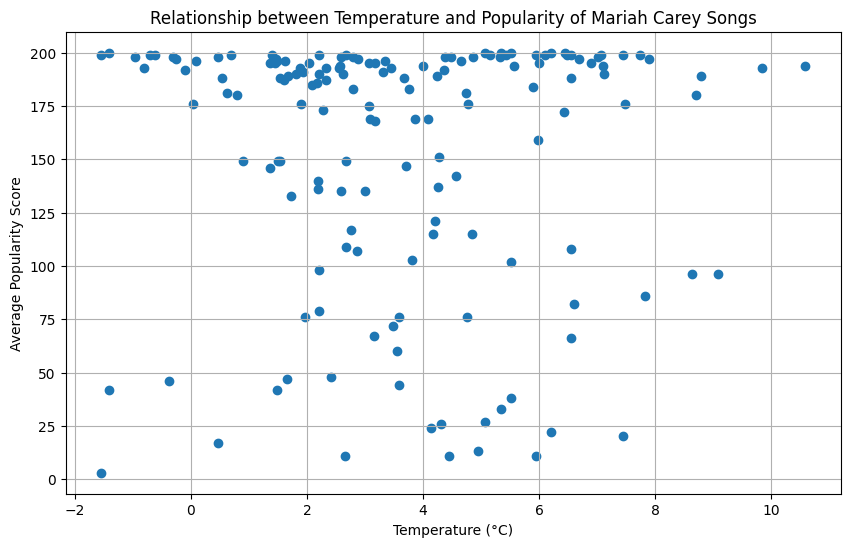

In [33]:
mcarey_df = songs_df[songs_df["artist"].notna()]
mcarey_df = mcarey_df[mcarey_df["artist"].str.contains("Mariah Carey")]
mcarey_df["popularity_score"] = 201 - mcarey_df["position"]
small_temperature_df = temperature_df[["date", "lufttemperatur"]]

# Merge temperature_df and mcarey_df
merged_df = small_temperature_df.merge(mcarey_df, on="date")
merged_df.sort_values("popularity_score")

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["lufttemperatur"], merged_df["popularity_score"], marker="o")
plt.xlabel("Temperature (°C)")
plt.ylabel("Average Popularity Score")
plt.title("Relationship between Temperature and Popularity of Mariah Carey Songs")
plt.grid(True)
plt.show()

#### Temperature

In [67]:
x_vars = list(audio_features_df.columns.values)
x_vars.remove("track_id")
x_vars.remove("mode")

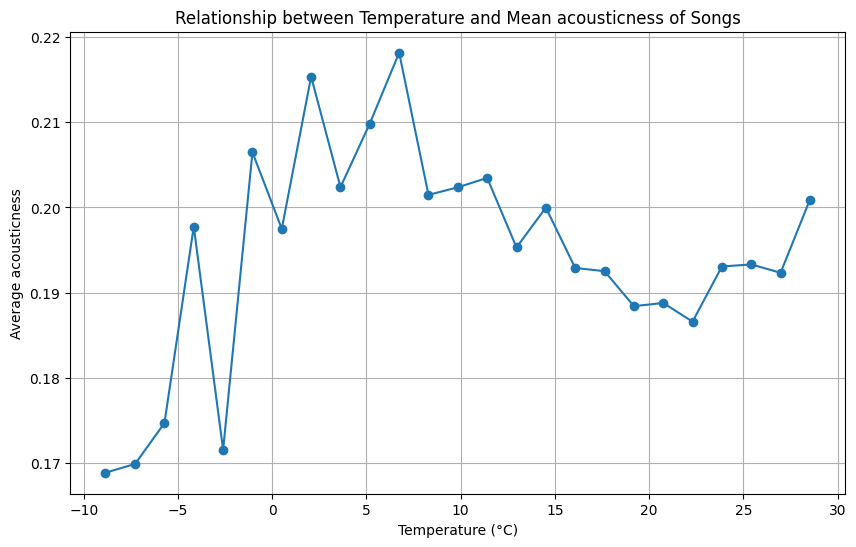

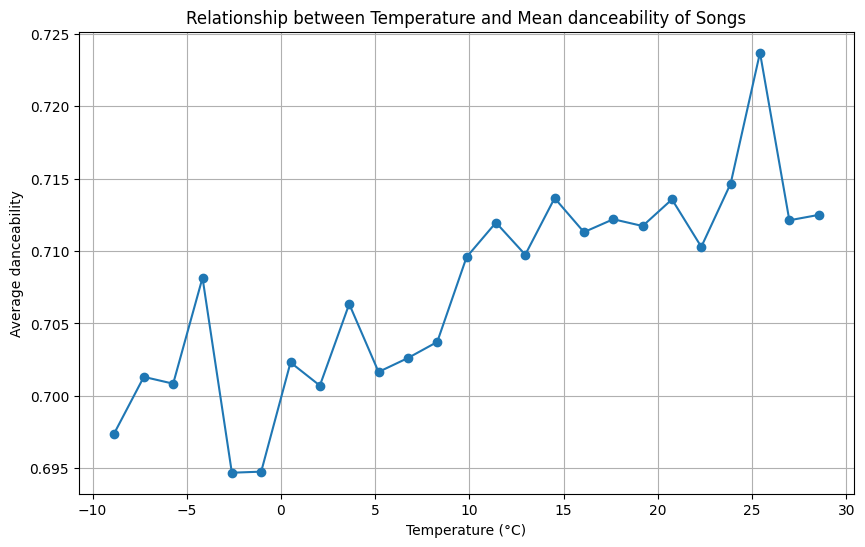

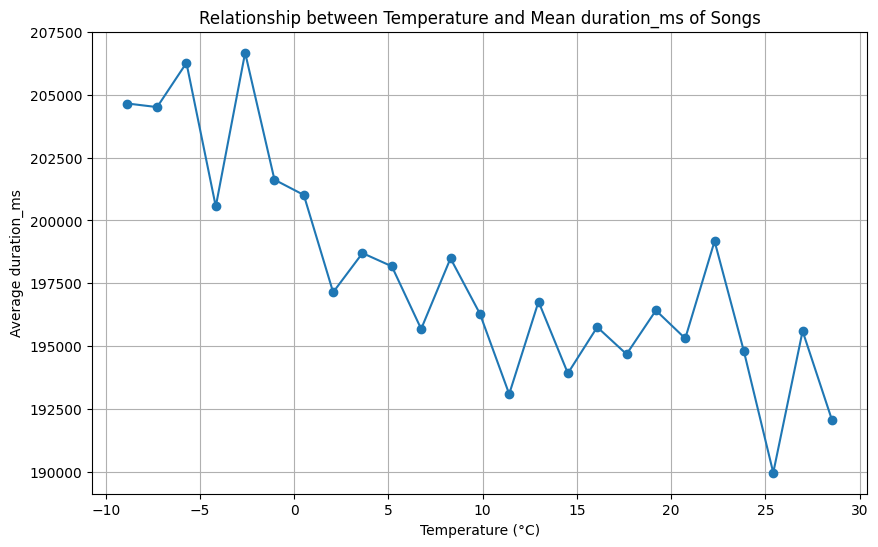

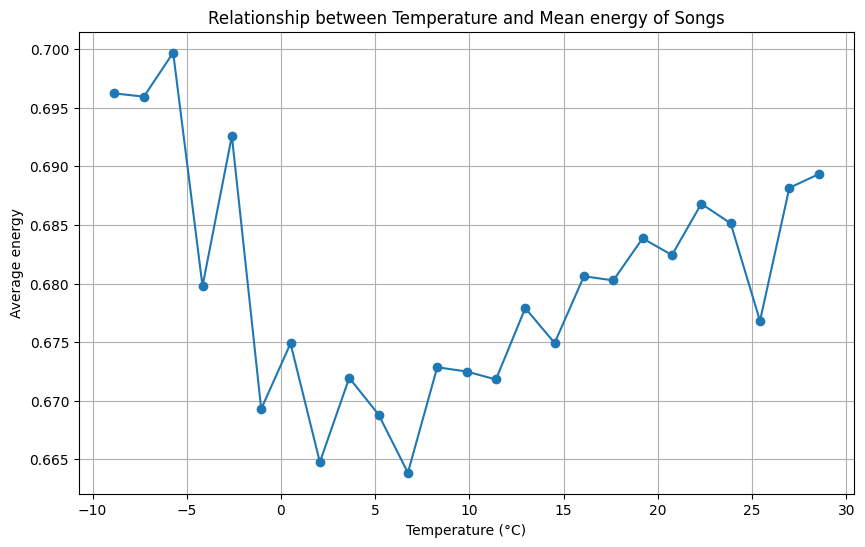

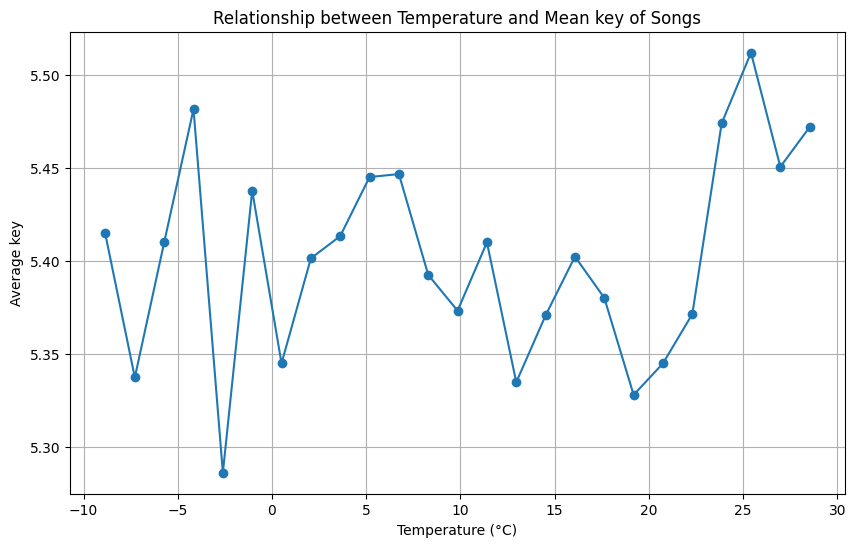

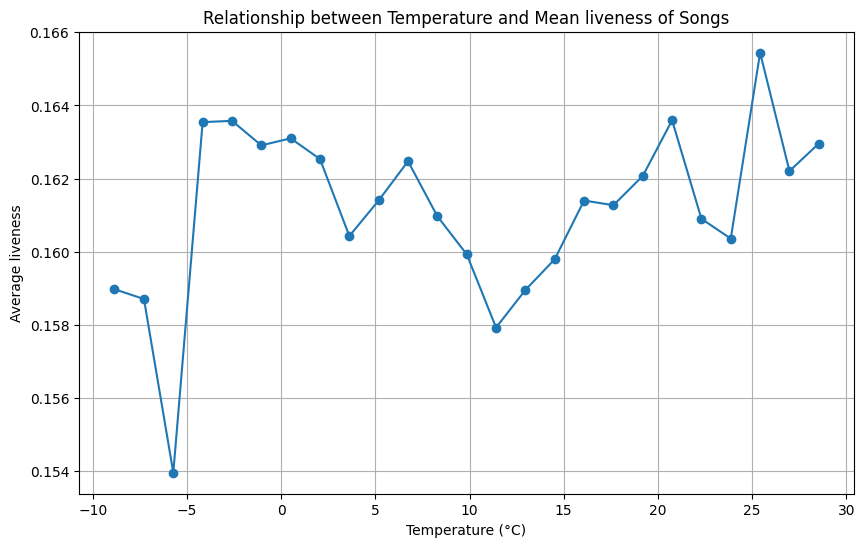

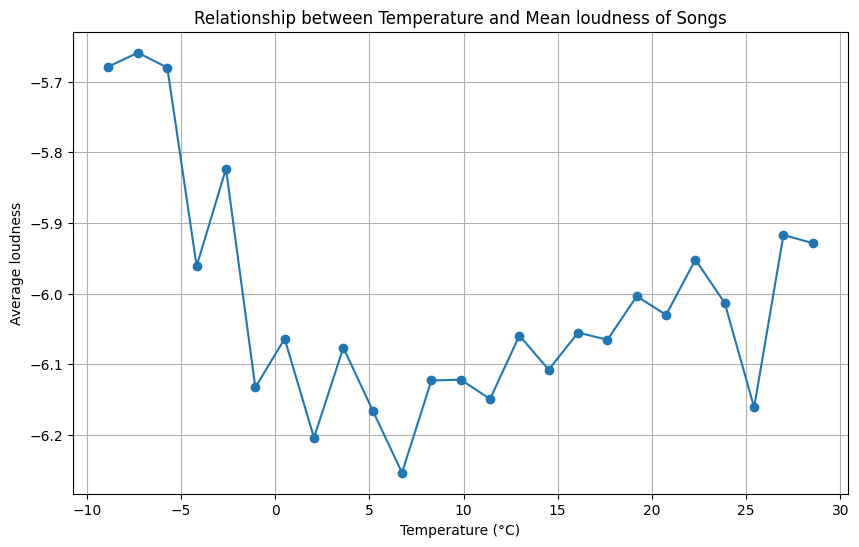

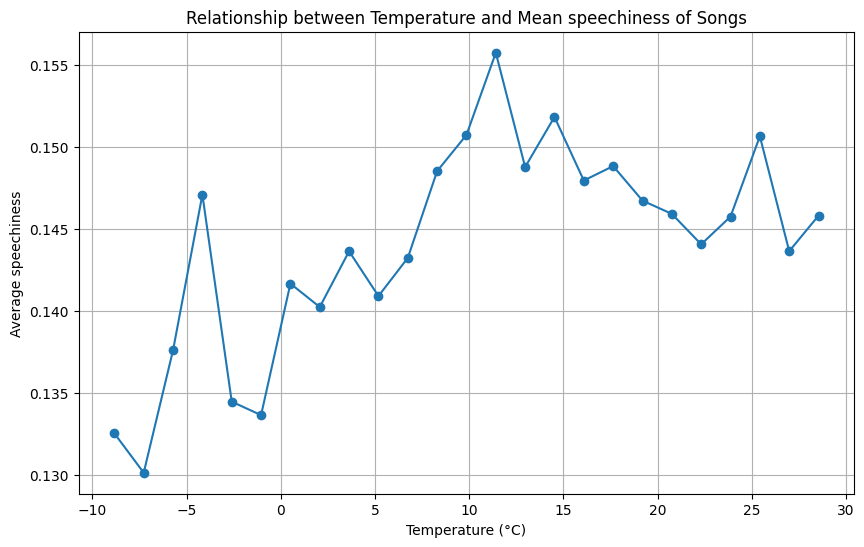

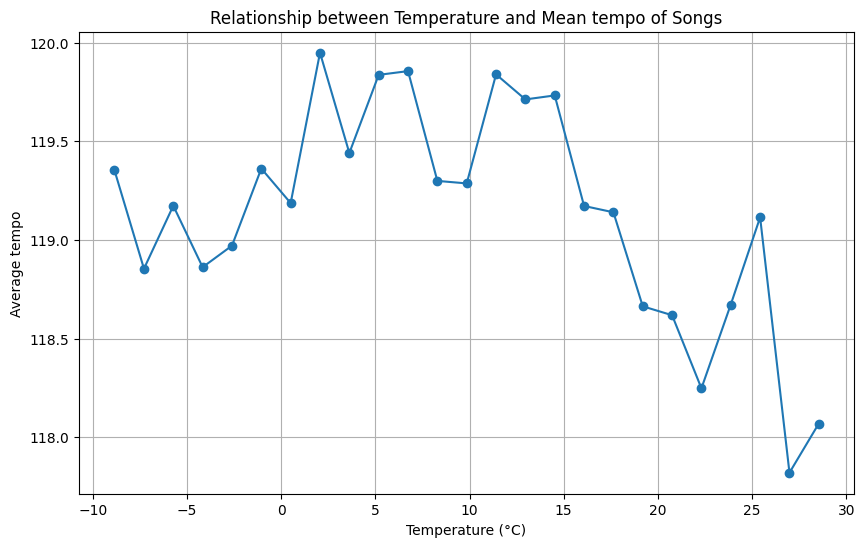

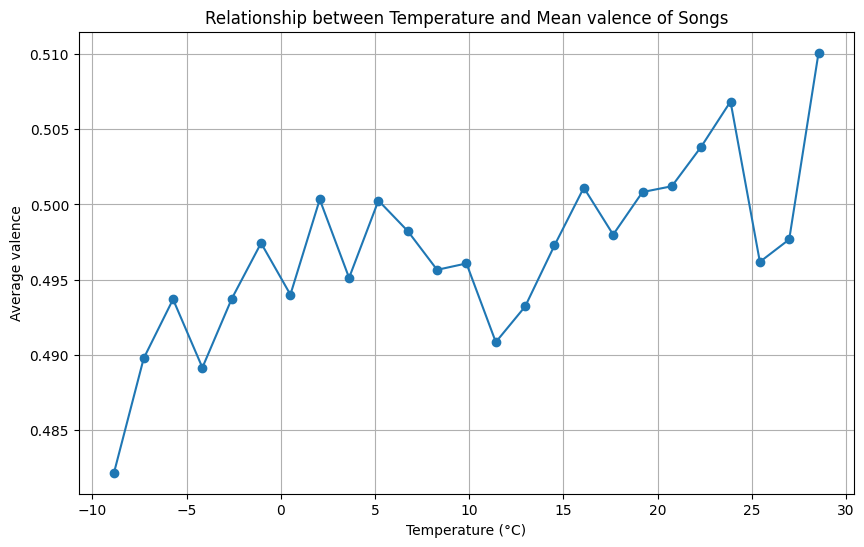

In [81]:
# join using common column "track_id"
small_songs_df = songs_df[["track_id", "date"]]
small_temperature_df = temperature_df[["date", "lufttemperatur"]]

# Merge temperature_df, songs_df, and audio_features_df
merged_df = small_temperature_df.merge(small_songs_df, on="date")
merged_df = merged_df.merge(audio_features_df, on="track_id")

# Create bins for the temperature values
merged_df["temperature_bin"] = pd.cut(merged_df["lufttemperatur"], 25)
bins = merged_df['temperature_bin'].cat.categories
avg_celsius_values = [(bin.left + bin.right) / 2 for bin in bins]

# bin_counts = merged_df['temperature_bin'].value_counts().sort_index()
# print(f"Bin Counts:\n{bin_counts}")

for var in x_vars:
    mean_valence_df = merged_df.groupby("temperature_bin")[var].mean().reset_index()
    # Plot the relationship between temperature and mean valence
    plt.figure(figsize=(10, 6))
    plt.plot(avg_celsius_values, mean_valence_df[var], marker="o")
    plt.xlabel("Temperature (°C)")
    plt.ylabel(f"Average {var}")
    plt.title(f"Relationship between Temperature and Mean {var} of Songs")
    plt.grid(True)
    plt.show()

#### Correlations

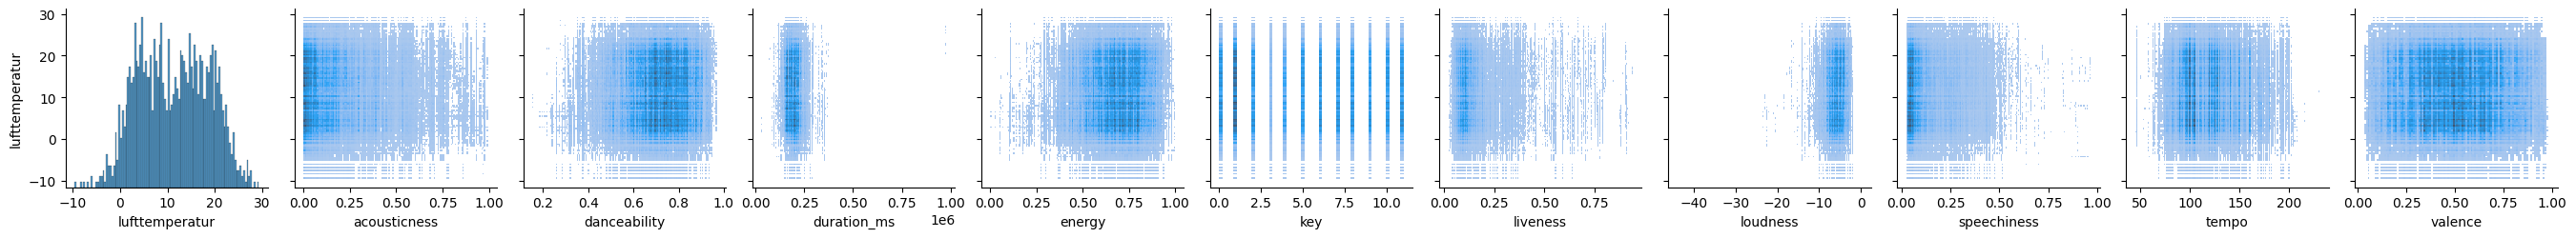

In [68]:
merged_df = temperature_df[["date", "lufttemperatur"]]
merged_df = merged_df.merge(songs_df, on="date")
merged_df = merged_df.merge(audio_features_df, on="track_id")
sns.pairplot(merged_df, kind="hist", x_vars=["lufttemperatur"] + x_vars, y_vars=["lufttemperatur"])  # kinds: ‘scatter’, ‘kde’, ‘hist’, ‘reg’
plt.show()

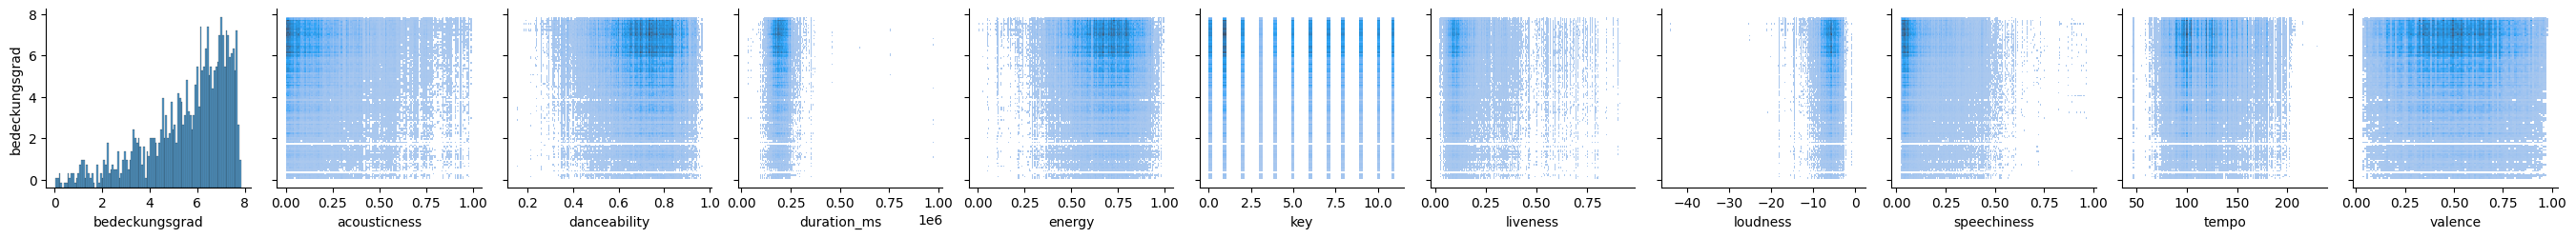

In [69]:
merged_df = cloud_df
merged_df = merged_df.merge(songs_df, on="date")
merged_df = merged_df.merge(audio_features_df, on="track_id")
sns.pairplot(merged_df, kind="hist", x_vars=["bedeckungsgrad"] + x_vars, y_vars=["bedeckungsgrad"])
plt.show()

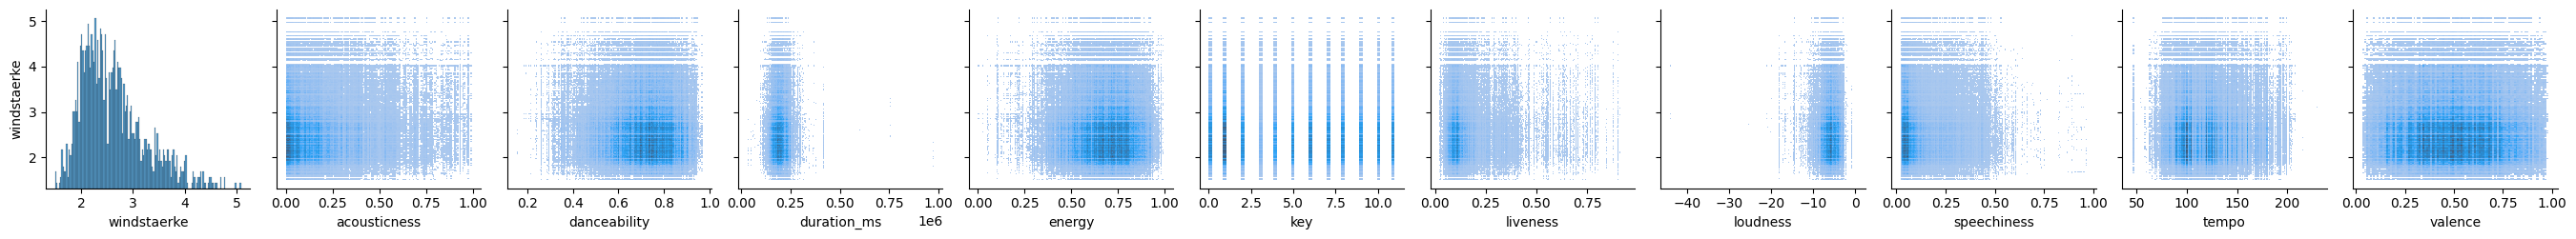

In [70]:
merged_df = wind_df
merged_df = merged_df.merge(songs_df, on="date")
merged_df = merged_df.merge(audio_features_df, on="track_id")
sns.pairplot(merged_df, kind="hist", x_vars=["windstaerke"] + x_vars, y_vars=["windstaerke"])
plt.show()

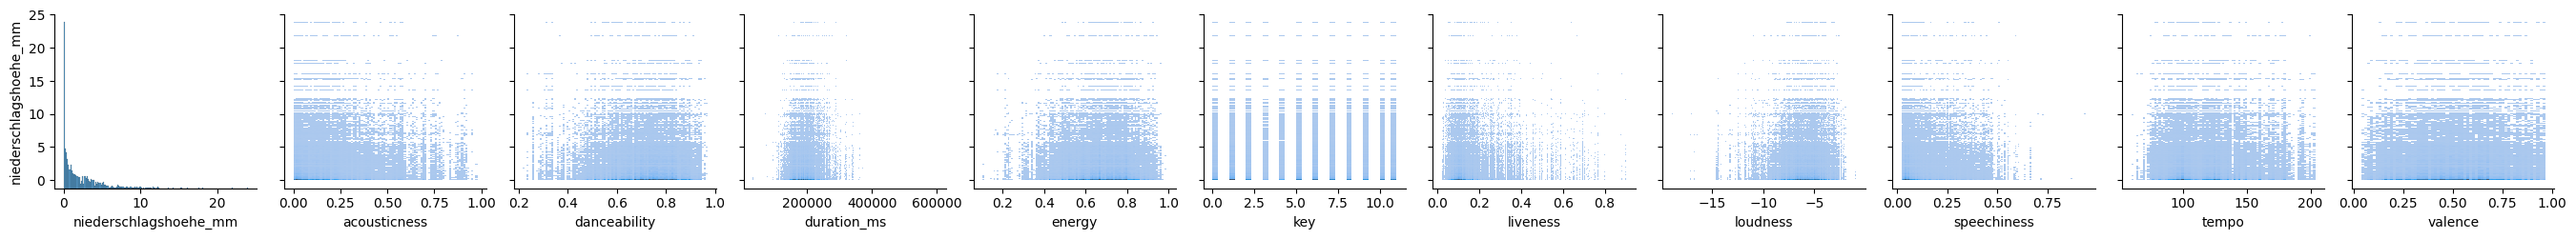

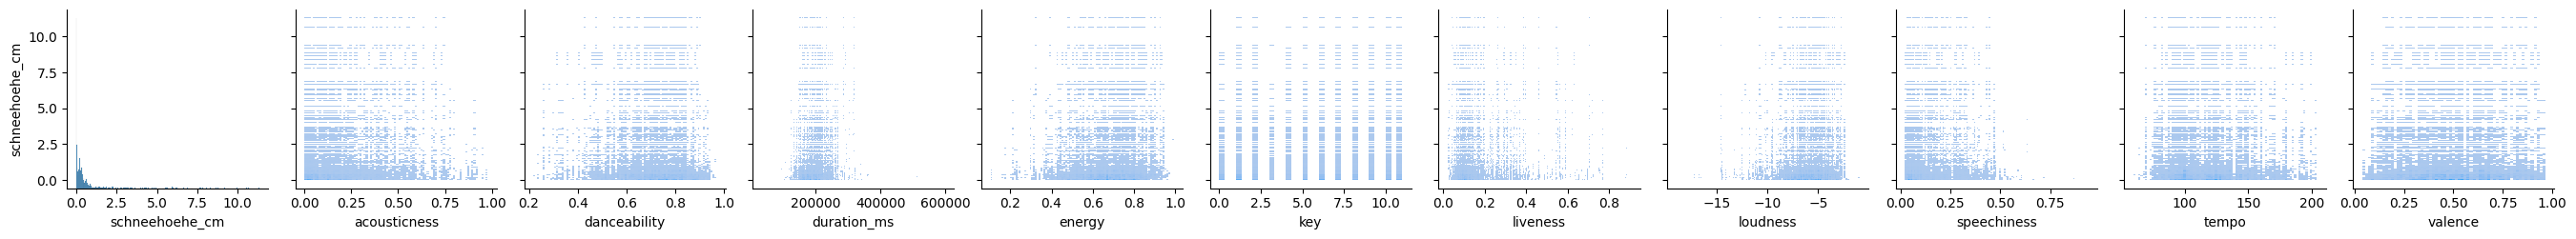

In [71]:
merged_df = rain_df
merged_df = merged_df.merge(songs_df[songs_df["position"] <= 50], on="date")
merged_df = merged_df.merge(audio_features_df, on="track_id")
sns.pairplot(merged_df, kind="hist", x_vars=["niederschlagshoehe_mm"]+x_vars, y_vars=["niederschlagshoehe_mm"])
plt.show()
sns.pairplot(merged_df, kind="hist", x_vars=["schneehoehe_cm"]+x_vars, y_vars=["schneehoehe_cm"])
plt.show()